<a href="https://colab.research.google.com/github/rebcervasio/Machine_Learning_Data_Science/blob/main/TensorFlow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learnng:**

works better for structured data (tables)
algorithms 'shallow algorithms': random forest, nearest neighboor...
    
**Deep Learning:**

works better for text data, image data
algorithms based on neural networks
- taking a photo/sound/text , transforming into numbers, passing inside the algorithm, converting it and finding patterns/features/weights, then reconverting into a understandable output for humans 
- neural networks: 
1. Input layer (one or more)
2. Hidden layers (learns patterns in data)
3. Output layer
pattersns=embedding=weigths=feature representation=feature vectors
    - types of learning: Supervised, Semi-supervised, Unsupervised and Transfer Learning
    - what is DL used for: recommendation (youtube), natural language processing (text), translation, speech recognition, computer vision
            - Sequence to sequence (seq2seq): translation/speech recog
            - Classfication/regression: computer vision, NLP
            - example, DeepMind: patterns in proteins to find how they fold (breakthrough)
            
  **TensorFlow**
  - Fast deep learning code in Python (and others)
  - GPU/TPU: graphics processing unit, tensor processing unit
      
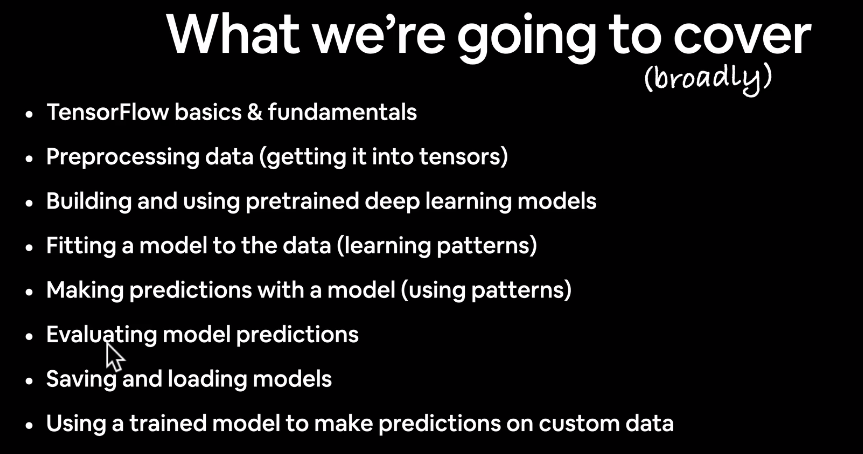

# In this notebook, we are going to cover some of the most fundamentals concepts of tensor using TensorFlow.

More specifically, we are going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & Numpy
*Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)

## Introduction to Tensors

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar # creates a tensor like object

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of simension of a tensor
# ndim = number of dimensions
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10,10]) # pass a list 
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimension of our vector
vector.ndim # one element in shape, so one dimension

1

In [ ]:
# Create a matrix (has more than one dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim # two elements inside the shape, so it means two dimensions

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3.,  2.],
                              [8.,  9.]], dtype=tf.float16)
another_matrix #shape is rows columns, dot indicates its float

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# What is the number of dimensions or another_matrix?
another_matrix.ndim # still two numbers inside the shape! even if there are more rows

2

In [ ]:
# Lets create a tensor
tensor = tf.constant([[[1, 2, 3], 
                       [4, 5, 6]], 
                      [[7, 8, 9],
                       [10, 11, 12]], 
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor # 3 big groups, 2 rows in each, 3 column in each

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim # 3 elements inside shape!

3

What we have create so far?

* Scalar: single number
* Vector: a number woth direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scaler, a 1-dim is a vector)

### Creating tensors with `tf.Variable`

In [ ]:
# Create the same tensor with tf.Variable()
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# LEts try to change one of the elements of our changeable tensor
changeable_tensor[0] = 7
changeable_tensor # using tf.Variable does not allow assignment of new element

TypeError: ignored

In [ ]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor # with .assign it works

In [ ]:
# Lets try to change the unchangeable tensor
# unchangeable_tensor[0]=7 # does not work
unchangeable_tensor[0].assign(7) # does not have the assign attribute!

# why this? we might want some tensors to be changed and others not

**Note**: rarely in practice we will need to decide whether to use `tf.constant`or `tf.Variable` to create tensors, as TensorFlow does this for you. However, if in doubt, use `tf.constant` and change it later if needed

### Creating random tensors:

They are tensors of some arbitrary size which contains random numbers, but why?
- it is a start to begin the fitting of the data, and then the algorithm will change the values as the model gets better

In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3,2))
print(f'random_1 \n {random_1}')

random_2 = tf.random.Generator.from_seed(7)
random_2 = random_2.normal(shape=(3,2))
print(f'random_2 \n {random_2}')

# Are they equal?
random_1 == random_2
#uniform distribution = rectangular distribution
#normal = normal distribution

### Shuffle the order of elements in a tensor

Why? To make the data randomized, the order can give some fake info into the model

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle the data so the inherent order)
not_shuffle = tf.constant([[10,7],
                           [3,4],
                           [2,5]])
print(not_shuffle)
print(not_shuffle.ndim)

In [ ]:
# Shuffle our non_shuffled tensor
tf.random.shuffle(not_shuffle) # the other has changed, but only in the first dimension!!!
#each line shuffles independently, 2,5 are always together for ex.

In [ ]:
tf.random.set_seed(42) # this is the global seed
tf.random.shuffle(not_shuffle, seed=42) # operation level random seed 

Other ways to make tensors:

In [ ]:
# Create a tensor of all ones
tf.ones([10,7])

In [ ]:
# Creates a tensor of all zeros
tf.zeros([10,7])

In [ ]:
# Creates a tensor of all zeros
tf.zeros(shape=(10,7))

### Turn `numpy` arrays into tensors

The main difference between Numpy arrays and TensorFlow tensors is that tensors can be run on a GPU much faster.

In [ ]:
import numpy as np

In [ ]:
numpy_A = np.arange(1, 25, dtype=np.int32)

# x = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non-capital for vector

In [ ]:
A = tf.constant(numpy_A, shape=(2, 3, 4)) #2*3*4 should be len(numpy_A), thus 24
B = tf.constant(numpy_A)
A, B

### Getting information from Tensors

### Getting information from tensors

* Shape = tensor.shape
* Rank = dimension .ndim
* Axis or dimension = tensor[0], tensor[:,1]
* Size = total number of items tensor.size

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2, 3, 4, 5])
rank_4_tensor
# bigegst group is 2, inside the 2 is 3 smaller, inside one group is 4, and then 5 elements in the linde

In [ ]:
rank_4_tensor[0]
#the first big group

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)
# size is 120 elements = 2*3*4*5

In [ ]:
# Get various attributes of our tensors
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1])
print("total number of elements in our tensor:", tf.size(rank_4_tensor).numpy())

### Indexing tensors

Tensors can be indexed just like python lists

In [ ]:
rank_4_tensor[:2, :2, :2, :2]

In [ ]:
rank_4_tensor[:1, :1, :3, :3]

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                             [3, 4]])
rank_2_tensor.shape, rank_2_tensor.ndim

In [ ]:
rank_2_tensor.shape[1]

In [ ]:
rank_2_tensor

In [ ]:
rank_2_tensor[:,-1]

In [ ]:
#Add in extra dimension to our rank2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) #-1 means expand the final axis

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=0) #0 means expand the first axis

### Manipulating tensors (tensor operations)

**Basic operations**

`+`, `-`, `*`, `/`

In [ ]:
# You can add values to a tensor using the additions operators
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

In [ ]:
# Original tensor is unchanged
tensor +10
tensor

In [ ]:
# Original tensor is changed by reassigning
tensor = tensor +10
tensor

In [ ]:
# Multiplication also works
tensor*10

In [ ]:
# Substraction if you want
tensor-10

In [ ]:
# We can use also the TF functions
tf.multiply(tensor, 10) # same output as before, 
# but the tf version if better for the DL calculations

In [ ]:
tensor # still unchanged until reassignement

** Matrix Multiplication**

In ML, matrix multiplications are one of the most common operations.

- dot product: first row with the first column, each element will multiply the other matrix's element and then we sum all of them (in one line)

Two rules for that:
1. The inner dimensions have to match
2. The resulting matrix has the shape of the outer dimensions

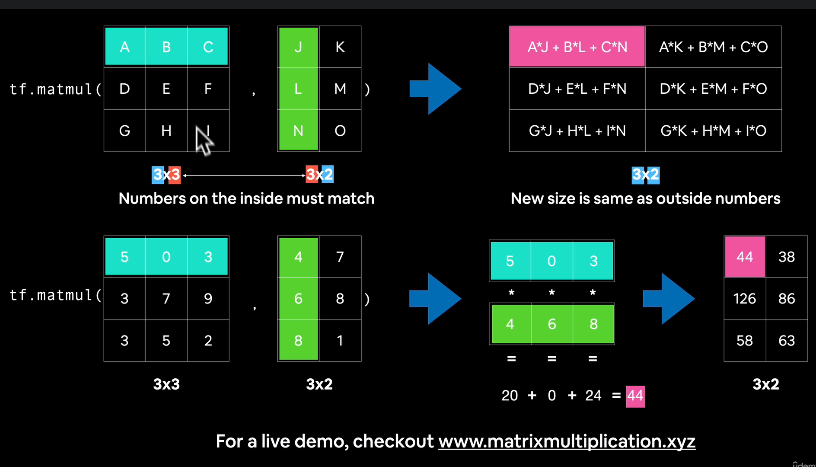

In [ ]:
# Matrix multiplication in tensorflow

# tf.linalg.matmul
print(tensor)

tf.matmul(tensor, tensor) # dot product!!!

In [ ]:
tensor*tensor # ELEMENT WISE!!! not dot product!!!

In [ ]:
# exercise
a = tf.constant([[1, 2, 5],
                 [7, 2, 1],
                 [3, 3, 3]])

b = tf.constant([[3,5],
                 [6,7],
                [1,8]])

tf.matmul(a, b)

In [ ]:
# MAtrix multiplation with a python operator
tensor @ tensor

In [ ]:
# Create a tensor of 3x2 tensor 
x = tf.constant([[1,2],
                 [3,4],
                 [3,2]])

y= tf.constant([[7,8], 
                [9,10],
                [11,12]])

# tf.matmul(x, y) # does not work
tf.matmul(x, tf.transpose(y)) # workssssssssss

In [ ]:
y

In [ ]:
tf.transpose(y)

In [ ]:
tf.reshape(y, shape=(2,3))

In [ ]:
# Lets change the shape of y using reshape
y_reshape = tf.reshape(y, shape=(2,3))
tf.matmul(x, y_reshape)

In [ ]:
# Reshaping x does not give the same result
tf.matmul(tf.reshape(x, shape=(2,3)), y)

**Attention** Transpose and Reshape do not give the same result! Transpose does Matrix$^{-1}$ and reshape just take the first elements and reshapes into the new shape

**Dot-product** 
Matrix Multiplication is also referred to as the dot product:

You can perfom matrix multiplication using:
`tf.matmul()`
`tf.tensordot()`

In [ ]:
x, y

In [ ]:
# Multiplying matrix x and y requires transposing one of them and putting the axes
tf.tensordot(tf.transpose(x), y, axes=1)

In [ ]:
# Transposing y
tf.matmul(x, tf.transpose(y))

In [ ]:
# Reshaping y
tf.matmul(x, tf.reshape(y, shape=(2, 3)))

In [ ]:
# Check the values of y, reshape y and transpose y
print(f"Normal y: \n {y} \n")
print(f"reshape y: \n {tf.reshape(y, shape=(2,3))} \n")
print(f"transpose y: \n {tf.transpose(y)} \n")


Generally, when performing matrix multiplication and one of the tensors does not line up, use transpose! not (usually) reshape!

### Changing the data type of a tensor
- most will be int32 but sometimes you may wanna change

In [ ]:
B = tf.constant([1.7, 7.4])
B.dtype

In [ ]:
C = tf.constant([7, 10])
C.dtype

In [ ]:
# Change from float32 into float16
B = tf.cast(B, dtype=tf.float16)
B.dtype

In [ ]:
# Change from int32 to int16
C = tf.cast(C, dtype=tf.int16)
C.dtype

### Aggregating tensors

Aggregating tensors = condensing them from multiple values down to a smaller amount of values

In [ ]:
# Get the absolute values
D = tf.constant([-7, -10])
D

In [ ]:
# Get the abosulte values
tf.abs(D) # returns another tensor

Lets go through the following forms of Aggregating
* Get the minimum, max, the mean and the sum of a tensor

In [ ]:
# Create a large random tensor
E = tf.constant(np.random.randint(0,100, 50))
E

In [ ]:
tf.size(E), E.shape, E.ndim

In [ ]:
tf.reduce_min(E)

In [ ]:
tf.reduce_max(E)

In [ ]:
tf.reduce_mean(E)

In [ ]:
tf.reduce_sum(E)

**Variance and Standard Deviation of the E tensor**

- Using `tf.math.reduce...` needs to change the dtype to float (aka 'real')

In [ ]:
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

In [ ]:
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

- Using the `tensorflow_propability` module

In [ ]:
import tensorflow_probability as tfp
tfp.stats.variance(E)

In [ ]:
tfp.stats.stddev(tf.cast(E, dtype=tf.float32)) 
# but for the standard deviation you still need to convert the dtype

At which index of each column the max ou min occurs?

In [ ]:
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F # highest is 0.9671

In [ ]:
# Find the positional maximum
tf.argmax(F) #gives the index

In [ ]:
# index on our largest value position
F[tf.argmax(F)]

In [ ]:
# Find the max value of F
tf.reduce_max(F) #gives the value

In [ ]:
# Check the equality
F[tf.argmax(F)] == tf.reduce_max(F) # gives True!

In [ ]:
# Find the index of the min
tf.argmin(F)

In [ ]:
# Find the value
tf.reduce_min(F)

In [ ]:
# Find the minimum using the index
F[tf.argmin(F)]

In [ ]:
# Checking again for equality of min
F[tf.argmin(F)] == tf.reduce_min(F)

### Squeezing a tesnor (removing all single dimensions)

In [ ]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(2, 1, 1, 1, 25))
G

In [ ]:
G.shape

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape 
# reduces dimensions of size 1 from the tensor
# gives back the 50

### OneHotEncoding!

- Preparing data: 0 or 1 in the form of lines in a matrix

In [ ]:
# Create a list of indeces
some_list1 = [0, 1, 2, 3]

# One hot encode our list of indices
tf.one_hot(some_list1, depth=len(some_list1))

# first row is for the first element - gives a one at the postion 0
# second row is for the second element - gives a one for the position of number 1
# and so on

In [ ]:
# Create a list of indeces
some_list = [0, 5, 2, 3]

# One hot encode our list of indices
tf.one_hot(some_list, depth=tf.reduce_max(some_list)+1)

# first row is for the first element - gives a one at the postion 0
# second row is for the second element - gives a one for the position of number 1
# and so on


In [ ]:
# Specify custom values for one hot encoding
tf.one_hot(some_list1, depth=4, on_value='yoyo', off_value='dancedance')

### More math functions

- Squaring, log, square root

In [ ]:
# Create a new tensor
H = tf.range(1, 10)
H

In [ ]:
tf.math.sqrt(tf.cast(H, dtype=tf.float32))
# requires non int type

In [ ]:
tf.math.log(tf.cast(H, dtype=tf.float32))

In [ ]:
tf.math.square(H)

### Tensors and Numpy

TensorFlow inteerects well with Numpy
Tensors run faster in GPUs and TPUs

In [ ]:
# Create a tensor directly from a numpy array
J = tf.constant(np.array([3., 7., 10.]))
J, type(J)

In [ ]:
# Convert our tensor back to np
J.numpy(), type(J.numpy())

In [ ]:
np.array(J) # other way to put in np

In [ ]:
# The default types are different
np_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])

# type(np_J), type(tensor_J)
np_J.dtype, tensor_J.dtype # default types are different

### Finding access to GPUs


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices()
#if we are running in a CPU, slower than the GPU and TPU

In [ ]:
tf.config.list_physical_devices("GPU")

In [ ]:
!nvidia-smi

**Note** : If you have a Cuda-enabled GPU, TF will automatically run

**Exercises**

In [ ]:
s = tf.constant(5)

In [ ]:
v = tf.constant([5,4])

In [ ]:
m = tf.constant([[5,5], 
             [5, 5]])

In [ ]:
t = tf.constant([[[5,5], 
             [5, 5]],
            [[5,5],
             [5,5]]])

In [ ]:
s.dtype, s.shape, tf.rank(s), tf.size(s)

In [ ]:
v.dtype, v.shape, tf.rank(v), tf.size(v)

In [ ]:
m.dtype, m.shape, tf.rank(m), tf.size(m)

In [ ]:
t.dtype, t.shape, tf.rank(t), tf.size(t)

In [ ]:
import numpy as np
r = tf.constant(np.random.rand(5, 300))
r2 = tf.constant(np.random.rand(5, 300))

In [ ]:
r

In [ ]:
r2

In [ ]:
r*r2

In [ ]:
tf.matmul(r, tf.transpose(r2))

In [ ]:
t1 = tf.constant(np.random.rand(224,224,3))

In [ ]:
t1

In [ ]:
tf.reduce_min(t1, axis=0)

In [ ]:
tf.argmin(t1, axis=0)

In [ ]:
tf.argmax(t1, axis=0)

In [ ]:
tf.reduce_max(t1, axis=0)

In [ ]:
tf.argmin(t1).shape

In [ ]:
# t1[tf.cast(tf.argmin(t1,0), dtype=tf.complex64)]

# F[tf.argmin(F)] == tf.reduce_min(F)

In [ ]:
t3 = tf.constant(np.random.randint(0,100, size=(1, 224, 224, 3)))
tf.squeeze(t3)

In [ ]:
t4 = tf.constant(np.random.randint(0,100, size=(5,5,5)))
t4

In [ ]:
tf.argmax(t4)

In [ ]:
tf.one_hot(t4, depth=100)

In [ ]:
# Groceries exercise
# banana, figues, strawberries, in prices
items = tf.constant([[2, 5, 4]])

#how many i buy per week
weekly_groceries = tf.constant([[6, 12, 7],
                               [10, 15, 1],
                                [15, 20, 4]])

#multiply using dot product
tf.matmul(items, weekly_groceries)*40

**TensorFlow Quick Guide for Beginners**

In [ ]:
import tensorflow as tf
print('TensorFlow version is :', tf.__version__)

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train

In [ ]:

x_test

In [ ]:

x_train.shape

In [ ]:
x_test.shape

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [ ]:
model

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

In [ ]:
tf.nn.softmax(predictions).numpy()

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

In [ ]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks :

> Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> tweak again -> fit it -> evaluate it again...

When it comles to evaluation, there are 3 words you should memorize:

> Vizualize, visualize, visualize

Its a good idea to visualize
* The data - what data are we working with? What doesit look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perfom while it learns?
* The predictions of the model - how to do the predictions of a model line upagains t the ground truth

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

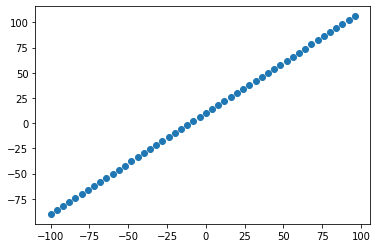

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* Training set: model learns from this data (70-80% of the toal data you have available)
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data avaialable 

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

Now we have our data in training and test sets, lets visualize again!

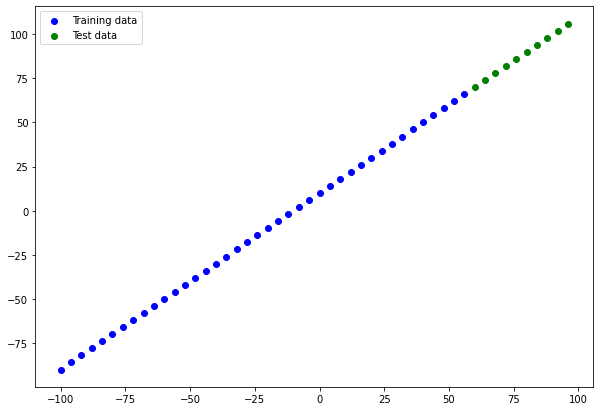

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='blue', label='Training data')

plt.scatter(X_test, y_test, c='green', label='Test data')

plt.legend()

In [ ]:
# Lets have a look at how to build a neural network for our data!

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model


In [ ]:
# Visualizing the model

model.summary()

ValueError: ignored

In [ ]:
# Lets create a model which builds automatically by defining 
#the input_shape augument

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # passing just one number X[0]
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total_params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters arent updated during training (this is typical when you bring in already learn patterns or parameters from other odels during **transfer learning**
 
 
 
Note! **Dense** means fully connected: all neurons connect to all the others in the next layer

**Extra link** :  mit inrtroduction to deep learning

In [ ]:
# Exercise: play with the hidden units

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) # passing just one number X[0]
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

model.fit(X_train, y_train, epochs=100, verbose=0)

model.evaluate(X_test, y_test, verbose=0)

model.predict([22.0])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 41ms/step


array([[19.903452, 19.891891, 19.83607 , 19.847017, 19.875013, 19.908583,
        19.891775, 19.91121 , 19.882847, 19.830654]], dtype=float32)

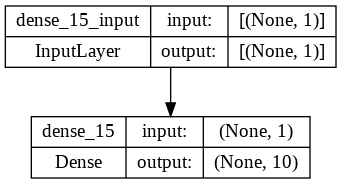

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

Model: "one_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
evaluation :  [3.196948289871216, 3.196948289871216]
1/1 [==============================] - 0s 47ms/step


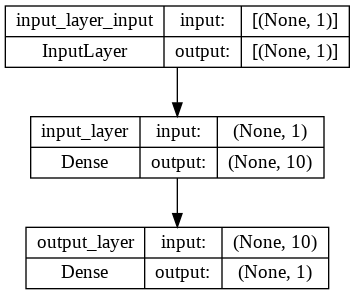

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'), # passing just one number X[0]
    tf.keras.layers.Dense(1, name='output_layer') 
], name="one_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

model.fit(X_train, y_train, epochs=100, verbose=0)

print('evaluation : ', model.evaluate(X_test, y_test, verbose=0))

model.predict([22.0])

plot_model(model=model, show_shapes=True)

### Visualizing our models' predictions

To visualize predictions, its a good idea to plot them against the ground truth.

Often you will seee this in the form of y_test or y_true vs y_pred (ground truth vs you rmodels predictions)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 42ms/step


array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66627 ],
       [107.25398 ],
       [111.841705]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting function
# - if you feel like you are goingg to reuse it many times, make a function

def plot_predictions(train_data=X_train, train_labels=y_train, 
                     test_data=X_test, test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth 
  """
  plt.figure(figsize=(10,7))
  # PLotting data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  # Show the legend
  plt.legend()

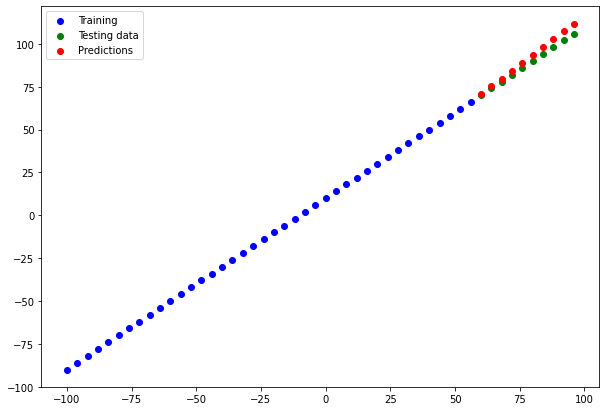

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, 
                 test_labels=y_test, predictions=y_pred)

Model: "one_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
evaluation :  [0.1960296630859375, 0.1960296630859375]
1/1 [==============================] - 0s 35ms/step


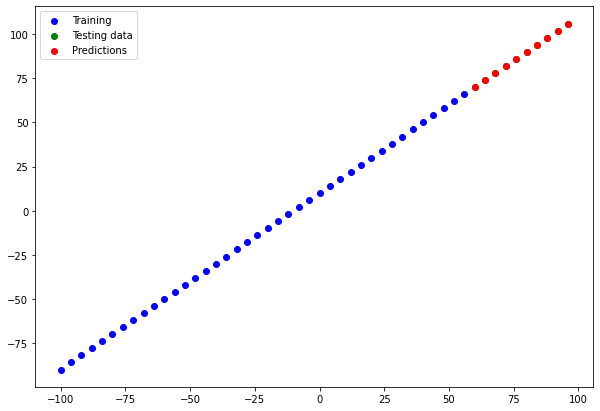

In [ ]:
# Exercise

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer'), # passing just one number X[0]
    tf.keras.layers.Dense(1, name='output_layer') 
], name="one_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.055),
              metrics=["mae"])

model.summary()

model.fit(X_train, y_train, epochs=100, verbose=0)

print('evaluation : ', model.evaluate(X_test, y_test, verbose=0))

y_pred = model.predict(X_test)

plot_model(model=model, show_shapes=True)

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, 
                 test_labels=y_test, predictions=y_pred)

### Evaluating our models predictions with regression evaluation metrics

Depeding on the problem you are working on, there will be different evaluation metrics to evaluate your models performance

Since we are working on a regression, two of the main metrics:
* MAE: mean aboslute error, "on average, how wrong is each pf the models predictions". as the great starter metric for any regression problem.
`tf.keras.losses.mae`
`tf.keras.losses.MAE()`
`tf.metrics.mean_absolute_error()`

* MSE - mean square error, 'square the average errors', when larger errors are more significant than smaller errors.
`tf.keras.losses.mse`
`tf.keras.losses.MSE()`
`tf.metrics.mean_square_error()`

* Huber: combination of MSE and MAE, less sensitive to outliers than MSE
`tf.keras.losses.Huber()`

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)
# loss and metrics are mae, as chosen above

1/1 [==============================] - 0s 21ms/step - loss: 0.1960 - mae: 0.1960


[0.1960296630859375, 0.1960296630859375]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae # gives metric for each of the prediction
# because y_preds has one dimension more than y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.1389  , 14.92127 , 12.49857 , 10.870791, 10.037936, 10.      ,
       10.756986, 12.308889, 14.655718, 17.797466], dtype=float32)>

In [ ]:
tf.squeeze(tf.constant(y_pred))
# making y_preds the same shape as y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.8611  ,  73.84841 ,  77.83572 ,  81.82302 ,  85.81032 ,
        89.79762 ,  93.78493 ,  97.772224, 101.75953 , 105.74683 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae # gives metric for each of the prediction

<tf.Tensor: shape=(), dtype=float32, numpy=0.19602966>

In [ ]:
# Calculate the mean square error
# REMOVE THE SINGLE DIMENSION!!!
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.03975764>

In [ ]:
# Make some functions to reuse MAE ana MSE

def mae(y_true, y_pred):
  y_pred_squeezed = tf.squeeze(y_pred)
  return tf.metrics.mean_absolute_error(y_true=y_test, y_preds=y_pred_squeezed)

def mse(y_true, y_pred):
  return tf.metrics.mean_square_error(y_true=y_test, y_preds=y_pred)

### Running experiments to improve ouir model

tweak, fit, evaluate, tweak, fit, evaluate

visualize, visualize, visualize!

1. Get more data
2. MAke our model larger (more complex, more layers, more hidden units)
3. Train for longer

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Lets do 3 modeling experiments

1. model_1 = 1 layer, 100 epochs
2. model_2 - 2 layers, 100 epochs
3. model_3 - 2 layers, 500 epochs

In [ ]:
# Build model 1

tf.random.set_seed(42)

# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train),len(X_test), len(y_test)

# Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

In [ ]:
# Evaluate the model
model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 114ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

1/1 [==============================] - 0s 43ms/step


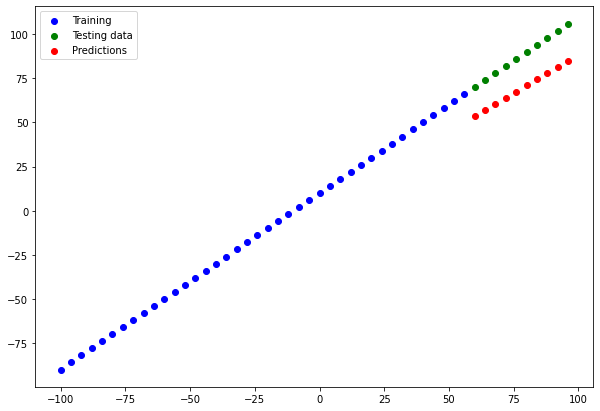

In [ ]:
# Make and plot predictions
y_preds1 = model1.predict(X_test)
plot_predictions(predictions=y_preds1)

In [ ]:
# Make some functions to reuse MAE ana MSE
# I add tf.squeeze to the function
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

In [ ]:
# Calculate metrics
mae_1 = mae(y_test, y_preds1)
mse_1 = mse(y_test, y_preds1) 

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

# Build Model 2!
* 2 dense layers trained for 100 epochs